Throughout the example below, we will gradually explain the components of linear regression. For the example, we will use randomly generated data to create a dependent variable with 30 observations (“samples”; N=30) and a single independent variable (P=1) with, of course, also 30 observations. So both the independent and dependent variable are of shape (30x1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
import time
%matplotlib inline

In [2]:
np.random.seed(1)

prespecified_covariance = np.array([[1, .8],
                                    [.8, 1]])

data = np.random.multivariate_normal(mean=[3, 7], cov=prespecified_covariance, size=30)

X = data[:, 0, np.newaxis] # Here, we slice the first column (0) and immediately add a new axis!
y = data[:, 1, np.newaxis] # same here

print('The shape of X is: %s' % (X.shape,))
print('The shape of y is: %s' % (y.shape,))


The shape of X is: (30, 1)
The shape of y is: (30, 1)


In [3]:
constant = np.ones((y.size, 1)) 
tuple_with_arrays = (constant, X)
X_with_cons = np.hstack(tuple_with_arrays)

let's take a look at the data. We'll create a scatter-plot for this.

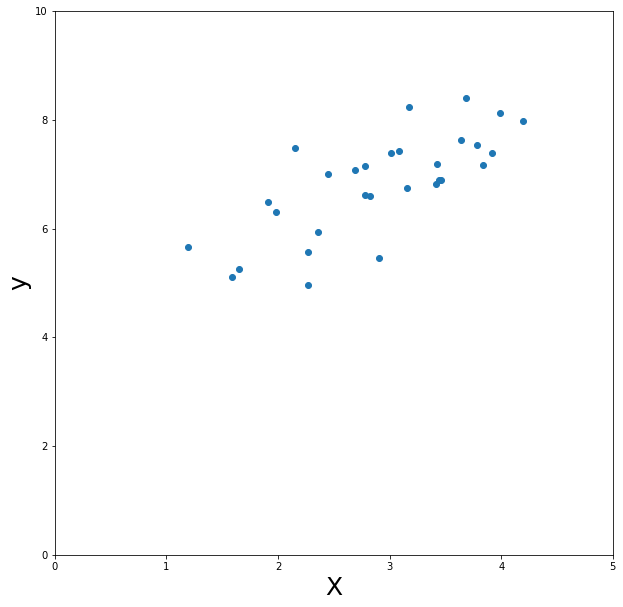

In [4]:
plt.figure(figsize=(10, 10))
plt.scatter(X_with_cons[:, 1], y)
plt.xlabel('X', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.xlim((0, 5))
plt.ylim((0, 10))
plt.show()

### Parameters in linear regression
As you can see, there seems to be some positive linear relationship between $X$ and $y$. In other words, an increase in $X$ will lead to an increase in $y$. But, at this moment, *how much exactly* $y$ changes for a increase in $X$ is unknown. By doing a linear regression with $X$ as our predictor of $y$, we can quantify this! 

The parameter, i.e. the "thing" that quantifies the influence of $X$ on $y$, calculated by this model is often called the **beta-parameter(s)** (but sometimes they're denoted as theta, or any other greek symbol/letter). The beta-parameter quantifies exactly how much $y$ changes if you increase $X$ by 1. Or, in other words, it quantifies how much influence $X$ has on $y$. In a formula ($\delta$ stands for "change in")\*: 

\begin{align}
\beta_{j} = \frac{\delta y}{\delta X_{j}} 
\end{align}

As you probably realize, each predictor in $X$ (i.e., $X_{j}$) has a parameter ($\beta_{j}$) that quantifies how much influence that predictor has on our target variable ($y$). This includes the intercept, our vector of ones (which is in textbooks often denoted by $\beta_{0}$; they often don't write out $\beta_{0}X_{0}$ because, if a vector of ones is used, $\beta_{0}\cdot 1$ simplifies to $\beta_{0}$).

Thus, linear regression describes a model in which a set of beta-parameters are calculated to characterize the influence of each predictor in $X$ on $y$, that together explain $y$ as well as possible (but the model is usually not perfect, so there will be some *error*, or "unexplained variance", denoted by $\epsilon$). As such, we can formulate the linear regression model as follows:

\begin{align}
y = \beta_{0} + X_{1}\beta_{1} + X_{2}\beta_{2} ... + X_{P}\beta_{P} + \epsilon
\end{align}

which is often written out as (and is equivalent to the formula above):

\begin{align}
y = \sum_{j=1}^{P}X_{j}\beta_{j} + \epsilon
\end{align}

Here, $\epsilon$ is the variance of $y$ that cannot be explained by our predictors (i.e, the *error*). 

But how does linear regression estimate the beta-parameters? The method most often used is called **'ordinary least squares'** (OLS; or just 'least squares'). This method tries to find a "weight(s)" for the independent variable(s) such that when you multiply the weight(s) with the independent variable(s), it produces an estimate of $y$ (often denoted as $\hat{y}$, or "y-hat") that is as 'close' to the true $y$ as possible. In other words, least squares tries to 'choose' the beta-parameter(s) ($\hat{\beta}$) such that the difference between $X$ multiplied with the beta(s) (i.e. our best guess of $y$, denoted as $\hat{y}$) and the true $y$ is minimized\*. 

Let's just formalize this formula for the 'best estimate of $y$' (i.e. $\hat{y}$):

\begin{align}
\hat{y}_{i} = \sum_{j=1}^{P}X_{ij}\hat{\beta}_{j} 
\end{align}

### Fitting OLS models
Thus far, we've ignored how OLS actually calculates (or "fits") the unknown parameters $\beta$. Roughly speaking, OLS finds parameters that minimize the *sum of squared errors* (hence the name '[ordinary] least squares'!):

\begin{align}
\min_{\beta} \sum_{i=1}^{N}(y_{i} - X_{i}\hat{\beta})^2 
\end{align}

This formula basically formalizes the approach of OLS "find the beta(s) that minimize the difference of my prediction of $y$ (calculated as $X \cdot \beta$) and the true $y$". Now, this still begs the question, *how does OLS estimate these parameters?* It turns out there is an "analytical solution" to this problem, i.e., there is a way to compute beta estimates that are guaranteed (given some assumptions) to give the parameters that minimize the summed squared error. This solution involves a little matrix algebra and is usually formulated as a series of matrix operations:

\begin{align}
\hat{\beta} = (\mathbf{X}^{T}\mathbf{X})^{-1}\mathbf{X}^{T}y
\end{align}

(For the mathematically inclined, see [this](https://economictheoryblog.com/2015/02/19/ols_estimator/) or [this](https://socialstatisticsfun.wordpress.com/2012/12/18/deriving-the-ols-estimator-continued/) blog for the derivation of the OLS solution.) In this formula, $\mathbf{X}^{T}$ refers to the transpose of the design matrix $\mathbf{X}$.

We don't expect you to understand every aspect of this formula, but you should understand the objective of least squares (minimizing the difference between $\hat{y}$ and true $y$) and what role the beta-parameters play in this process (i.e. a kind of weighting factor of the predictors).

Let's look at how we'd implement the OLS solution in code. We'll use the `@` operator for matrix multiplication and the `inv` function from the `numpy.linalg` module for the matrix inversion (i.e., the $(X^{T}X)^{-1}$ part).

In [5]:
from numpy.linalg import inv

est_betas = inv(X_with_cons.T @ X_with_cons) @ X_with_cons.T @ y

print("Shape of estimated betas: %s" % (est_betas.shape,))
print(est_betas)

Shape of estimated betas: (2, 1)
[[4.25897963]
 [0.88186203]]


"What? Why are there two beta-parameters?", you might think. This is of course because you also use the intercept as a predictor, which also has an associated beta-value (weighting factor). Here, the first beta refers to the intercept of the model (because it's the first column in the design-matrix)! The second beta refers to our 'original' predictor. Thus, the model found by least squares for our generated data is (i.e. that leads to our best estimate of $y$, i.e. $\hat{y}$:

\begin{align}
\hat{y} = X_{1} \cdot 4.259 + X_{2} \cdot 0.882 
\end{align}

And since our intercept (here $X_{1}$) is a vector of ones, the formula simplifies to:

\begin{align}
\hat{y} = 4.259 + X_{2} \cdot 0.882
\end{align}

Now, let's calculate our predicted value of $y$ ($\hat{y}$) by implementing the above formula by multiplying our betas with the corresponding predictors (intercept and original predictor). Here, because we have two predictors, we simply add the two "`predictor * beta`" terms to get the final $\hat{y}$.

In [6]:
y_hat = X_with_cons @ est_betas 
y_analytic = y_hat
print('The predicted y-values are: \n\n%r' % y_hat)

The predicted y-values are: 

array([[5.7162258 ],
       [7.64565627],
       [6.82238735],
       [5.65711982],
       [6.70719685],
       [6.25586475],
       [7.2814034 ],
       [6.26277124],
       [7.29362822],
       [6.70672011],
       [7.50612402],
       [6.01015768],
       [6.3415733 ],
       [7.26833396],
       [6.98078313],
       [7.59385684],
       [7.71516161],
       [7.46966721],
       [7.77394491],
       [5.30902899],
       [7.31258926],
       [7.05767059],
       [7.03969805],
       [6.15914774],
       [6.63192082],
       [6.75167254],
       [7.95782627],
       [6.91573708],
       [5.94300991],
       [6.41880247]])


Now, let's plot the predicted $y$ values ($\hat{y}$) against the true $y$ values ($y$) as a line

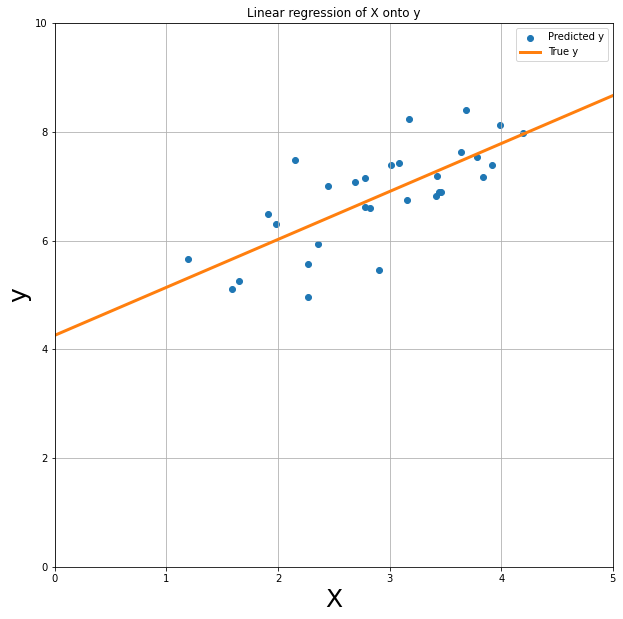

In [7]:
x_lim = (0, 5)
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel('X', fontsize=25)
plt.ylabel('y', fontsize=25)
plt.xlim(x_lim)
plt.ylim((0, 10))
y_min_pred = est_betas[0] + est_betas[1] * x_lim[0]
y_max_pred = est_betas[0] + est_betas[1] * x_lim[1]
plt.plot(x_lim, [y_min_pred, y_max_pred], ls='-', c='tab:orange', lw=3)
plt.legend(['Predicted y', 'True y'])
plt.title('Linear regression of X onto y')
plt.grid()
plt.show()

### Residuals and model fit
Alright, so now we have established the beta-values that lead to the best prediction of $y$ - in other words, the best fit of our model. But how do we quantify the fit of our model? One way is to look at the difference between $\hat{y}$ and y, which is often referred to as the model's **residuals**. This difference between $\hat{y}$ and $y$ - the residuals - is the exact same thing as the $\epsilon$ in the linear regression model, i.e. the **error** of the model. Thus, for a particular dependent variable $y$, the residuals ($\epsilon$) of a particular fitted model with parameters $\hat{\beta}$ are computed as: 

\begin{align}
\epsilon = y - \mathbf{X}\hat{\beta} 
\end{align}

To visualize the residuals (plotted as red dashed lines):

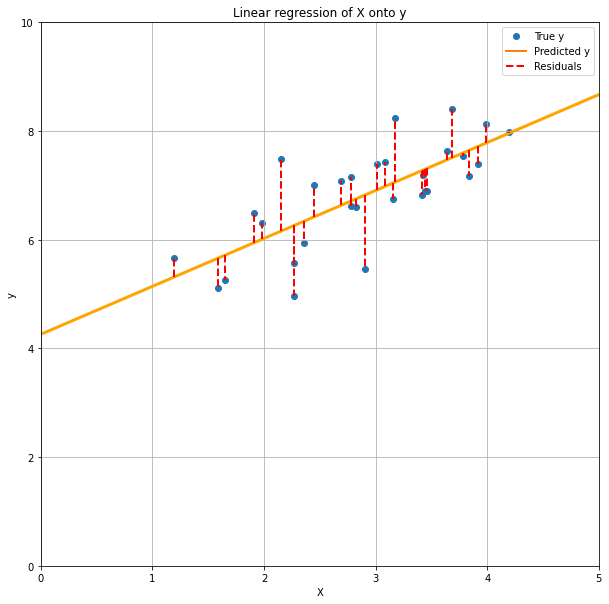

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.xlim(x_lim)
plt.ylim((0, 10))
y_min_pred = est_betas[0] + est_betas[1] * x_lim[0]
y_max_pred = est_betas[0] + est_betas[1] * x_lim[1]
plt.plot(x_lim, [y_min_pred, y_max_pred], ls='-', c='orange', lw=3)
plt.title('Linear regression of X onto y')

for i in range(y.size):
    plt.plot((X[i], X[i]), (y_hat[i], y[i]), linestyle='--', c='red', lw=2)


from matplotlib.lines import Line2D
custom_lines = [
    Line2D([0], [0], color='tab:blue', marker='o', ls='None', lw=2),
    Line2D([0], [0], color='tab:orange', lw=2),
    Line2D([0], [0], color='r', ls='--', lw=2)
]

plt.legend(custom_lines, ['True y', 'Predicted y', 'Residuals'])
plt.grid()
plt.show()

In fact, the model fit is often summarized as the **mean of the squared residuals** (also called the 'mean squared error' or MSE), which is thus simply the (length of the) red lines squared and averaged. In other words, the MSE refers to the average squared difference between our predicted $y$ and the true $y$\*:

\begin{align}
\mathrm{MSE} = \frac{1}{N}\sum_{i=1}^{N} (y_{i} - \hat{y}_{i})^2
\end{align}

\* The "$\frac{1}{N}\sum_{i=1}^{N}$" is just a different (but equally correct) way of writing "the average of all residuals from sample 1 to sample N".

In [39]:
MSE = ((y - y_hat) ** 2).mean()
print('MSE value is : %.3f' % MSE)

MSE value is : 0.384


Another metric for model fit in linear regression is "R-squared" ($R²$). R-squared is calculated as follows:

\begin{align}
R^2 = 1 - \frac{\sum_{i=1}^{N}(y_{i} - \hat{y}_{i})^2}{\sum_{i=1}^{N}(y_{i} - \bar{y})^2}
\end{align}

where $\bar{y}$ represents the mean of $y$. As you can see, the formula for R-squared consists of two parts: the numerator ($\sum_{i=1}^{N}(y_{i} - \hat{y}_{i})^2$) and the denominator ($\sum_{i=1}^{N}(y_{i} - \bar{y}_{i})^2$). The denominator represents the *total* amount of squared error of the actual values ($y$) relative to the mean ($\bar{y}$). The numerator represents the *reduced* squared errors when incorporating knowledge from our (weighted) independent variables ($X_{i}\hat{\beta}$). So, in a way you can interpret R-squared as *how much better my model is including `X` versus a model that only uses the mean*. Another conventional interpretation of R-squared is the proportion of variance our predictors ($X$) together can explain of our target ($y$).

As expected, the code is quite straightforward:

In [9]:

numerator = np.sum((y - y_hat) ** 2)  # remember, y_hat equals X * beta
denominator = np.sum((y - np.mean(y)) ** 2)
r_squared_analytic = 1 - numerator / denominator

print('The R² value is: %.3f' % r_squared_analytic)

The R² value is: 0.549


### So far summary: linear regression 
Alright, hopefully this short recap on linear regression has refreshed your knowledge and understanding of important concepts such as predictors/design matrix ($X$), target ($y$), least squares, beta-parameters, intercept, $\hat{y}$, residuals, MSE, and $R^2$. 

In sum, for a linear regression analysis you need some predictors ($X$) to model some target ($y$). You perform ordinary least squares to find the beta-parameters that minimize the sum of squared residuals. To assess model fit, you can look at the mean squared error (average mis-prediction) or $R^2$ (total explained variance).

## Linear Regression Using Gradient Descent


Gradient descent is an important concept in machine learning and deep learning. Gradient descent is a name for a generic class of computer algorithms which minimize a function. These algorithms achieve this end by starting with initial parameter values and iteratively moving towards a set of parameter values that minimize some cost function or metric—that's the descent part.

Gradient descent begins with the definition of a cost function. But what is this cost function? Well, for linear regression, we define the cost function as the sum of the squared errors of our predictions. In other words, the cost function is the difference between the predicted values a line will give us, and the actual output in the dataset, squaring the result at the end.

The error function (also called cost function sometines) looks like this: 

\begin{align}
error = \frac{1}{N} \sum_{i}^{N} (y - (b_1x_i +b_0))^2
\end{align}

Lines that fit our data better (where better is defined by our error function) will result in lower error values. If we minimize this function, we will get the best line for our data.

In [10]:
def Calc_R_squared(y, Y_pred):
    numerator = np.sum((y - Y_pred) ** 2)  
    denominator = np.sum((y - np.mean(y)) ** 2)
    r_squared = 1 - numerator / denominator
    
    return r_squared

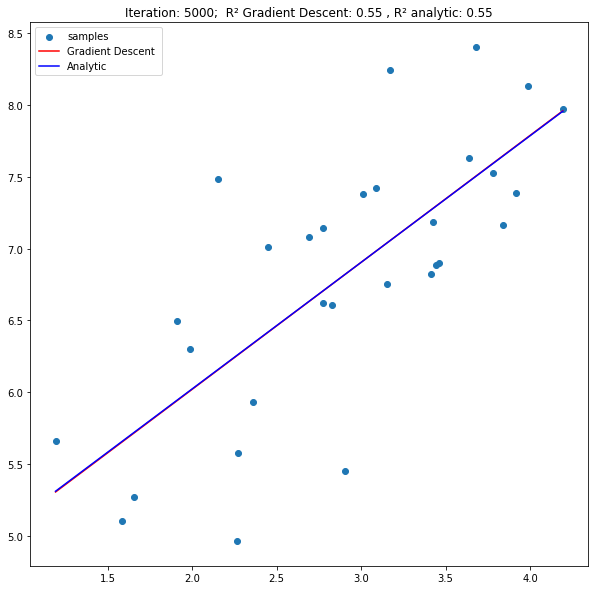

In [11]:
m = 0
c = 0

L = 0.01  # The learning Rate
epochs = 5001  # The number of iterations to perform gradient descent

n = float(len(X)) # Number of elements in X



# Performing Gradient Descent 
for i in range(epochs): 
    Y_pred = m*X + c  # The current predicted value of Y
    D_m = (-2/n) * sum(X * (y - Y_pred))  # Derivative wrt m
    D_c = (-2/n) * sum(y - Y_pred)  # Derivative wrt c
    m = m - L * D_m  # Update m
    c = c - L * D_c  # Update c
    if i % 500 == 0:
        r_squared = Calc_R_squared(y, Y_pred)
        clear_output()
        plt.figure(figsize=(10, 10))
        plt.scatter(X, y) 
        plt.plot([min(X), max(X)], [min(Y_pred), max(Y_pred)], color='red') 
        plt.plot([min(X), max(X)], [min(y_analytic), max(y_analytic)], color='blue') 
        plt.title('Iteration: {};  R\u00b2 Gradient Descent: {:0.2f} , R\u00b2 analytic: {:0.2f}'.format(i,r_squared ,r_squared_analytic))
        plt.legend(['samples','Gradient Descent ', 'Analytic'])
        plt.show()



        time.sleep(1.5)

## GLM with fMRI

## GLM in fMRI analyses
Univariate fMRI analyses basically use the same linear regression model as we've explained above to model the activation of voxels (with some minor additions) based on some design-matrix.

### The target
However, compared to "regular" data, one major difference is that *the dependent variable ($y$) in fMRI analyses is timeseries data*, which means that the observations of the dependent variable (activation of voxels) vary across time. fMRI data is a discretely sampled signal -- *not* a continuous one). Let's plot it as a line:

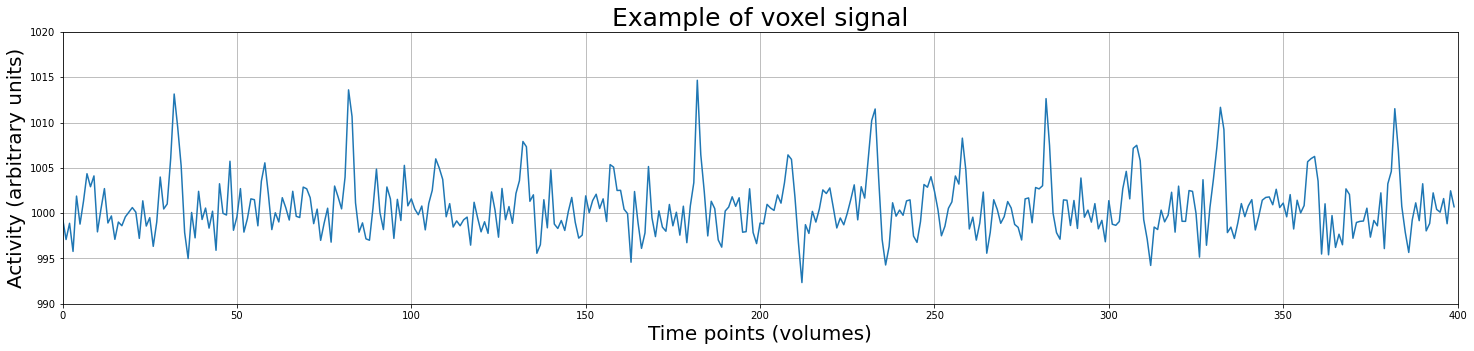

In [12]:
voxel_signal = np.load('example_voxel_signal.npy')
x_lim, y_lim = (0, 400), (990, 1020)
plt.figure(figsize=(25, 5))
plt.plot(voxel_signal)
plt.xlabel('Time points (volumes)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.title('Example of voxel signal', fontsize=25)
plt.grid()
plt.show()

Alright, this looks better. Now, let's look at our potential predictors ($X$).

### The predictors, or: what should we use to model our target?

#### Defining independent variables
So, we know what our target is (the time-series data), but what do we use to model/explain our signal? Well, in most neuroimaging research, your predictors are defined by your experimental design! In other words, your predictors consist of *whatever you think influenced your signal*.

This probably sounds nonsensical, which is likely caused by the fact that we derive our independent variables (predictors) in most (observational) psychological research differently. This is because in (observational) psychological studies *both the independent variables and the dependent variables are __measured__*. In other words, our predictors are just other variables that you measured in your study. 

In neuroimaging research, however, we often derive our predictors not from measures variables but from properties of the particular experiment that we use in the MRI-scanner (or during EEG/MEG acquisiton, for that matter). In other words, we can use any property of the experiment that we believe explains our signal.

Alright, probably still sounds vague. Let's imagine a (hypothetical) experiment in which we show subjects images of either circles or squares during fMRI acquisition lasting 800 seconds, as depicted in the image below:

![img](https://docs.google.com/drawings/d/e/2PACX-1vQwC4chpnzsDEzKhrKH_WHhMX7vJswY4H0pkyIxdlxI_I2GG5e8i6lsiWUO0SUk7NBgdV-vXD5PIleJ/pub?w=950&h=397)

Note that the interstimulus interval (ISI, i.e., the time between consecutive stimuli) of 50 seconds, here, is quite unrealistic; often, fMRI experiments have a much shorter ISI (e.g., around 3 seconds). Here, we will use an hypothetical experiment with an ISI of 50 seconds because that simplifies things a bit and will make figures easier to interpret.

Anyway, let's talk about what predictors we could use given our experimental paradigm. One straighforward suggestion about properties that influence our signal is that our signal is influenced by the stimuli we show the participant during the experiment. As such, we could construct a predictor that predicts some response in the signal when a stimulus (here: a square or a circle) is present, and no response when a stimulus is absent.

Fortunately, we kept track of the onsets (in seconds!) of our stimuli during the experiment:

In [13]:
onsets_squares = np.array([10, 110, 210, 310, 410, 510, 610, 710], dtype=int)
onsets_circles = np.array([60, 160, 260, 360, 460, 560, 660, 760], dtype=int)

For now, we'll ignore the difference between square-stimuli and circle-stimuli by creating a predictor that lumps the onsets of these two types of stimuli together in one array. This predictor thus reflects the hypothesis that the signal is affected by the presence of a stimulus (regardless of whether this was a square or a circle). (Later in the tutorial, we'll explain how to *compare* the effects of different conditions.)

In [14]:
onsets_all = np.concatenate((onsets_squares, onsets_circles))
print(onsets_all)

[ 10 110 210 310 410 510 610 710  60 160 260 360 460 560 660 760]


Now, we need to do one last thing: convert the `onsets_all` vector into a proper predictor. Right now, the variable contains only the onsets, but a predictor should be an array with the same shape as the target.

Given that our predictor should represent the hypothesis that the signal responds to the presence of a stimulus (and doesn't respond when a stimulus is absent), we can construct our predictor as a vector of all zeros, except at indices corresponding to the onsets of our stimuli, where the value is 1.

We do this below:

In [15]:
predictor_all = np.zeros(800)  # because the experiment lasted 800 seconds
predictor_all[onsets_all] = 1  # set the predictor at the indices to 1

print("Shape of predictor: %s" % (predictor_all.shape,))
print("\nContents of our predictor array:\n%r" % predictor_all.T)

Shape of predictor: (800,)

Contents of our predictor array:
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 

We can even plot it in a similar way as we did with the voxel signal:

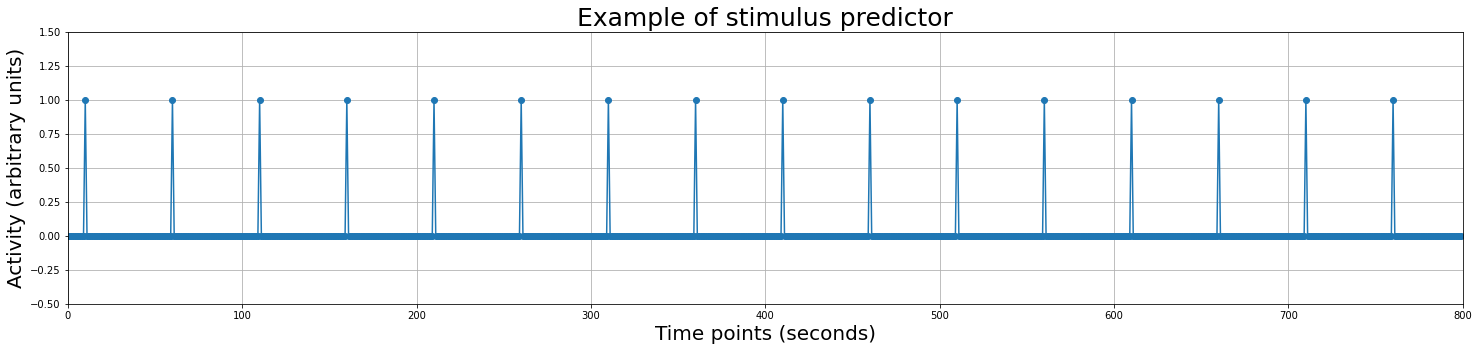

In [16]:
plt.figure(figsize=(25, 5))
plt.plot(predictor_all, marker='o')
plt.xlabel('Time points (seconds)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(0, 800)
plt.ylim(-.5, 1.5)
plt.title('Example of stimulus predictor', fontsize=25)
plt.grid()
plt.show()

#### Resampling
However, if you look back at the plot of the voxel signal, you might notice that there is a problem in our stimulus-predictor - it seems to be on a different timescale than the signal. And that's true! The signal from the voxel is measured in volumes (in total 400, with a TR of 2 seconds) while the stimulus-onsets are defined in seconds (ranging from 10 to 760)!

This "issue" can be solved by downsampling our predictor to the time resolution of our signal, i.e., one datapoint every two seconds (given that our TR is 2 seconds). In the plot below, we show you with dashed red lines which datapoints would constitute our predictor *after* downsampling (we only show the first 100 seconds for clarity).

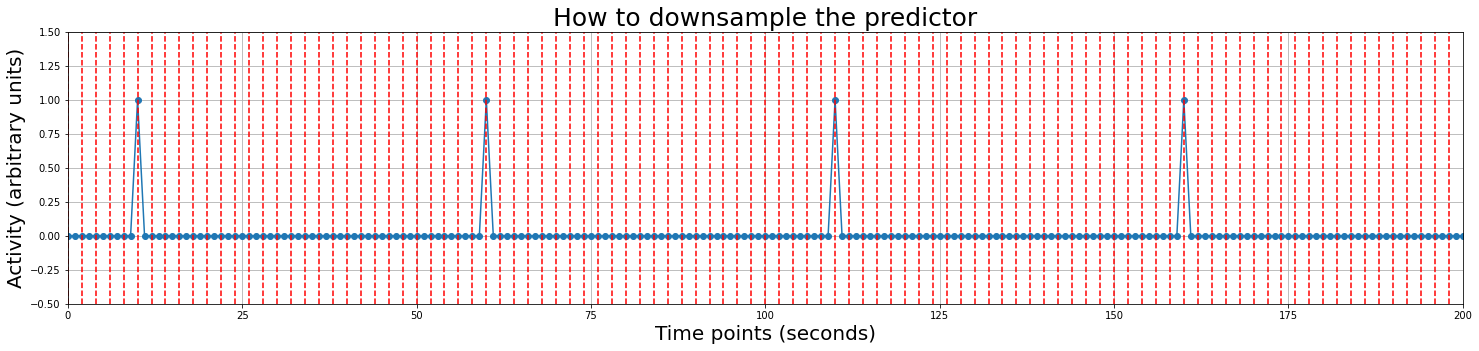

In [17]:
plt.figure(figsize=(25, 5))
plt.plot(predictor_all, marker='o')
plt.xlabel('Time points (seconds)', fontsize=20)
plt.ylabel('Activity (arbitrary units)', fontsize=20)
plt.xlim(0, 200)
plt.ylim(-.5, 1.5)
plt.title('How to downsample the predictor', fontsize=25)
plt.grid()

for t in np.arange(0, 200, 2):
    plt.axvline(t, ls='--', c='r')

plt.show()

Resampling in Python can be done using the `interp1d` function from the `scipy.interpolate` package. It works by first creating a mapping between the *scale* of the original array and the *values* of the original array, and then converting the original array to a *different scale*. We'll show you how this would be done with our `predictor_all` array. 

```python
resampler = interp1d(original_scale, original_array, kind='linear')  # interp1d returns a (new) function
downsampled_array = resampler(desired_scale) 
```

Note that when creating the mapping by calling `interp1d`, the function returns a *new function*, which we store in a variable called `resampler`. Now, we can call with new function with our desired scale for our array, which will result the original array downsampled at the desired scale (note that this works exactly the same for *up*sampling). Also note that we we use specifically "linear" resampling (by using `kind='linear'`). In practice, most neuroimaging packages use non-linear resampling/interpolation when downsampling predictors, but the details of different kinds of resampling are beyond the scope of this course. 

Anyway, let's try this on our predictor by resampling it from the original scale (0-800 seconds) to the scale of our signal (i.e., at 0, 2, 4, 8 ... 800 seconds, assuming a TR of 2 seconds). Note the function `np.arange`, which can be used to create evenly spaced arrays (with `np.arange(start, stop, step)`):

In [18]:

from scipy.interpolate import interp1d
original_scale = np.arange(0, 800, 1)  # from 0 to 800 seconds
print("Original scale has %i datapoints (0-800, in seconds)" % original_scale.size)
resampler = interp1d(original_scale, predictor_all)

desired_scale = np.arange(0, 800, 2)
print("Desired scale has %i datapoints (0, 2, 4, ... 800, in volumes)" % desired_scale.size)
predictor_all_ds = resampler(desired_scale)

Original scale has 800 datapoints (0-800, in seconds)
Desired scale has 400 datapoints (0, 2, 4, ... 800, in volumes)


Awesome! Now, we have a predictor ($X$) and a target ($y$) of the same shape, so we can apply linear regression! But before we do this, let's plot the predictor and the signal in the same plot:

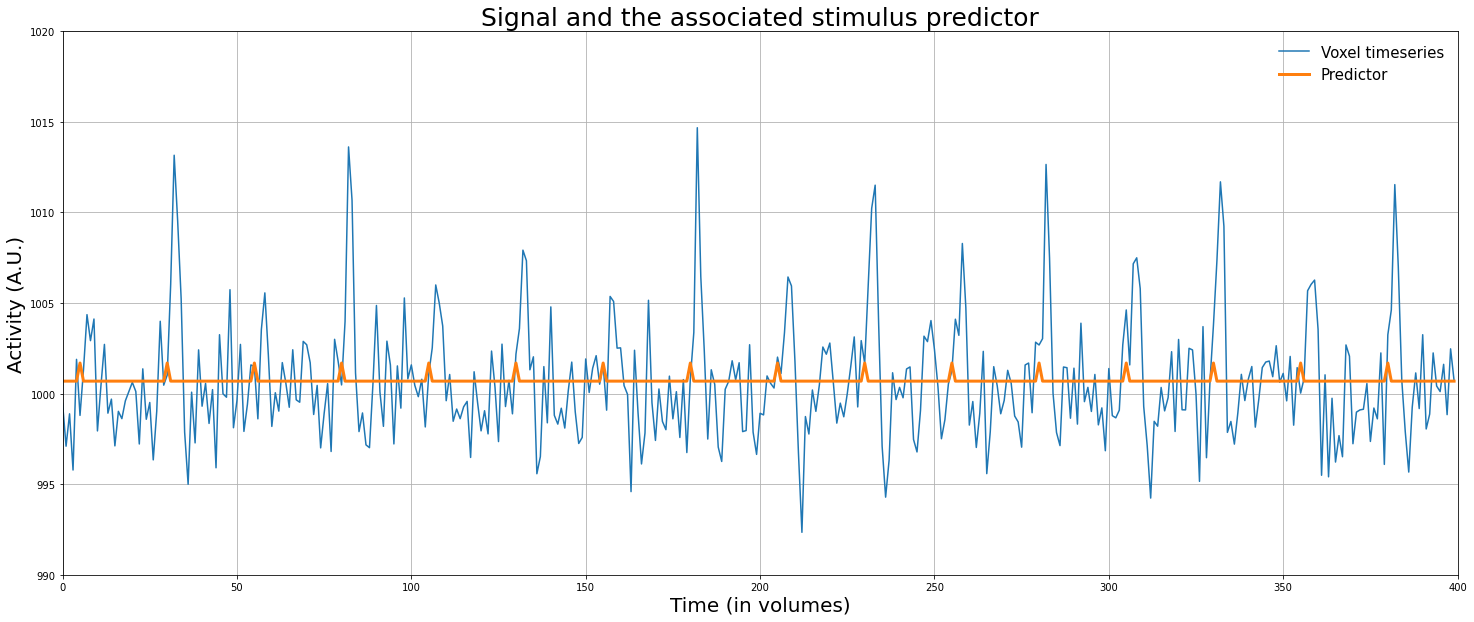

In [19]:
plt.figure(figsize=(25, 10))
plt.plot(voxel_signal)
plt.plot(predictor_all_ds + voxel_signal.mean(), lw=3)
plt.xlim(x_lim)
plt.ylim(y_lim)
plt.xlabel('Time (in volumes)', fontsize=20)
plt.ylabel('Activity (A.U.)', fontsize=20)
plt.legend(['Voxel timeseries', 'Predictor'], fontsize=15, loc='upper right', frameon=False)
plt.title("Signal and the associated stimulus predictor", fontsize=25)
plt.grid()
plt.show()

At this moment, we have everything that we need to run linear regression: a predictor (independent variable) and a signal (target/dependent variable) at the same scale and the same number of data points! This regression analysis allows us to answer the question whether the activity of the signal is significantly different when a stimulus is presented (i.e., at times when the predictor contains ones) than when no stimulus is presented (i.e., at times when the predictor contains zeros). 

Or, phrased differently (but mathematically equivalent): what is the effect of a unit increase in the predictor ($X = 0 = \mathrm{no\ stimulus} \rightarrow X = 1 = \mathrm{stimulus}$) on the target (the signal)? We will answer this question in the next section!

In [20]:
from nilearn.glm.first_level.hemodynamic_models import glover_hrf

c:\Users\eyalh\AppData\Local\Continuum\anaconda3\envs\fmri-HIT\lib\site-packages\nilearn\glm\__init__.py:55: FutureWarning: The nilearn.glm module is experimental. It may change in any future release of Nilearn.
  warn('The nilearn.glm module is experimental. '


In [21]:
TR = 2
osf = 2
length_hrf = 32  # sec

canonical_hrf = glover_hrf(tr=TR, oversampling=osf, time_length=length_hrf, onset=0)
canonical_hrf /= canonical_hrf.max()
print("Size of canonical hrf variable: %i" % canonical_hrf.size)

Size of canonical hrf variable: 32


In [22]:
'''We need to "squeeze" out the extra singleton axis, because that's
what the np.convolve function expects, i.e., arrays of shape (N,) and NOT (N, 1)
To go from (N, 1) --> (N,) we'll use the squeeze() method'''
predictor_conv = np.convolve(predictor_all.squeeze(), canonical_hrf)

print("The shape of the convolved predictor after convolution: %s" % (predictor_conv.shape,))

# After convolution, we also neem to "trim" off some excess values from
# the convolved signal (the reason for this is not important to understand)
predictor_conv = predictor_conv[:predictor_all.size]

print("After trimming, the shape is: %s" % (predictor_conv.shape,))

# And we have to add a new axis again to go from shape (N,) to (N, 1),
# which is important for stacking the intercept, later
predictor_conv = predictor_conv[:, np.newaxis]

print("Shape after adding the new axis: %s" % (predictor_conv.shape,))

The shape of the convolved predictor after convolution: (831,)
After trimming, the shape is: (800,)
Shape after adding the new axis: (800, 1)


In [23]:
original_scale = np.arange(0, 800)
resampler = interp1d(original_scale, np.squeeze(predictor_conv))

desired_scale = np.arange(0, 800, 2)
predictor_conv_ds = resampler(desired_scale)

if predictor_all_ds.ndim == 1:  # do not remove this! This adds a singleton dimension, such that you can call np.hstack on it
    predictor_all_ds = predictor_all_ds[:, np.newaxis]
icept = np.ones((predictor_all_ds.size, 1))
X_simple = np.hstack((icept, predictor_all_ds))

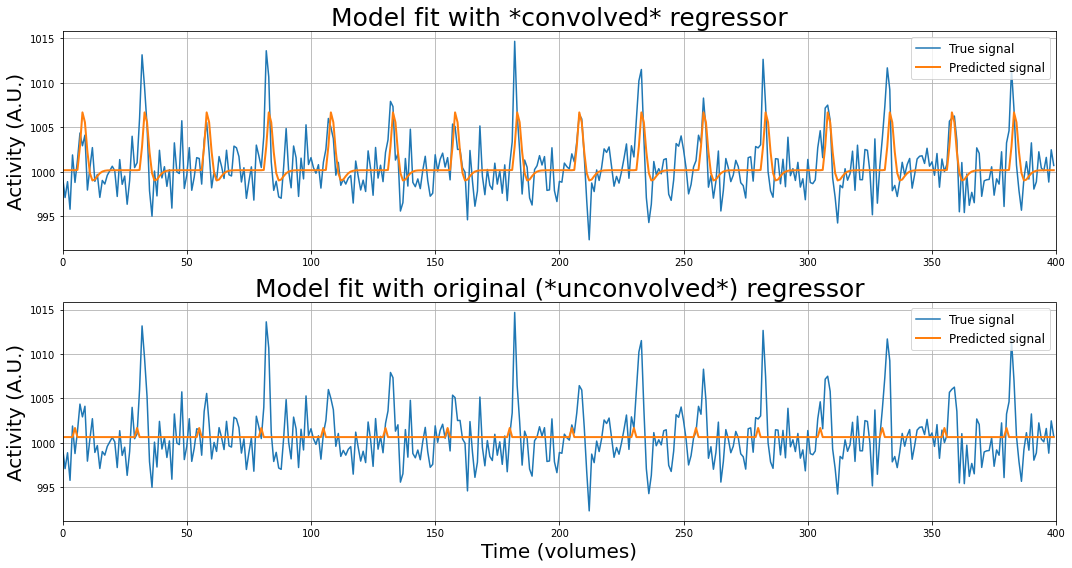

In [24]:
if predictor_conv_ds.ndim == 1:
    # Add back a singleton axis (which was removed before downsampling)
    # otherwise stacking will give an error
    predictor_conv_ds = predictor_conv_ds[:, np.newaxis]

intercept = np.ones((predictor_conv_ds.size, 1))
X_conv = np.hstack((intercept, predictor_conv_ds))
betas_conv = inv(X_conv.T @ X_conv) @ X_conv.T @ voxel_signal

plt.figure(figsize=(15, 8))

plt.subplot(2, 1, 1)
plt.plot(voxel_signal)
plt.plot(X_conv @ betas_conv, lw=2)
plt.xlim(x_lim)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.title("Model fit with *convolved* regressor", fontsize=25)
plt.legend(['True signal', 'Predicted signal'], fontsize=12, loc='upper right')
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(voxel_signal)
betas_simple = np.array([1000.64701684, 1.02307437])
plt.plot(X_simple @ betas_simple, lw=2)
plt.xlim(x_lim)
plt.ylabel("Activity (A.U.)", fontsize=20)
plt.title("Model fit with original (*unconvolved*) regressor", fontsize=25)
plt.legend(['True signal', 'Predicted signal'], fontsize=12, loc='upper right')
plt.xlabel("Time (volumes)", fontsize=20)
plt.grid()

plt.tight_layout()
plt.show()

In [25]:
from numpy.linalg import lstsq  # numpy implementation of OLS, because we're lazy

y_hat_conv = X_conv @ betas_conv
y_hat_orig = X_simple @ lstsq(X_simple, voxel_signal, rcond=None)[0]

MSE_conv = ((y_hat_conv - voxel_signal) ** 2).mean()
MSE_orig = ((y_hat_orig - voxel_signal) ** 2).mean()

print("MSE of model with convolution is %.3f while the MSE of the model without convolution is %.3f." %
     (MSE_conv, MSE_orig))

R2_conv = 1 - (np.sum((voxel_signal - y_hat_conv) ** 2) / np.sum((voxel_signal - voxel_signal.mean()) ** 2))
R2_orig = 1 - (np.sum((voxel_signal - y_hat_orig) ** 2) / np.sum((voxel_signal - voxel_signal.mean()) ** 2))

print("R-squared of model with convolution is %.5f and without convolution it is %.5f." % 
     (R2_conv, R2_orig))

MSE of model with convolution is 7.192 while the MSE of the model without convolution is 10.327.
R-squared of model with convolution is 0.30629 and without convolution it is 0.00388.
